In [ ]:
sweep_ids = ['g1aqz63h', 'otphs2zh', 
             's45fguzh', '1cesj6eh',
             'g31vwkha', 'pqy9i2hp']
config_names = ['tl_fast1', 'tl_fast1', 
                'tl_best5', 'tl_best5',
                'tl_best6', 'tl_best6']

In [ ]:
import pandas as pd
import wandb
api = wandb.Api()

In [ ]:
metric = 'f1_score'

In [ ]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [ ]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
35,tl_fast1,devout-sweep-1,0.976330
36,tl_fast1,curious-sweep-2,0.975395
37,tl_fast1,trim-sweep-3,0.979741
38,tl_fast1,ethereal-sweep-4,0.980595
39,tl_fast1,swift-sweep-5,0.979934


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns_colours = sns.color_palette()
sns_colours[1], sns_colours[5] = sns_colours[5], sns_colours[1]
sns_colours[5], sns_colours[7] = sns_colours[7], sns_colours[5]
sns_colours[2], sns_colours[6] = sns_colours[6], sns_colours[2]
sns_colours[3], sns_colours[5] = sns_colours[5], sns_colours[3]

In [ ]:
sns_colours

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

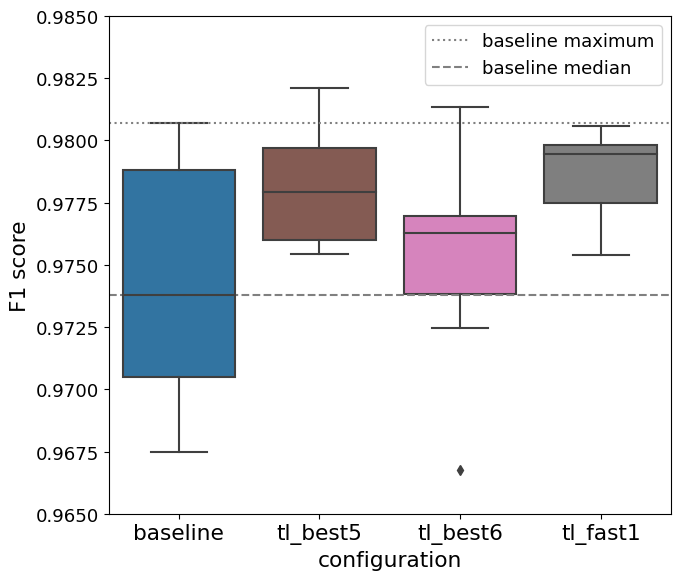

In [ ]:
plt.rc('font', size=13)

fig = plt.figure(figsize=(7, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)
plt.ylim([0.965, 0.985])
plt.hlines(0.980712, -0.5, 3.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.973796, -0.5, 3.5, linestyles='dashed', color='grey', label='baseline median')

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel('F1 score', size='large')
ax.set_xlabel("configuration", size='large')
plt.xticks(fontsize='large')
plt.legend()

#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/12_transfer_best_scores_paper_v3.pdf', dpi=600)

/tmp/ipykernel_15029/2156223985.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)
/tmp/ipykernel_15029/2156223985.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.swarmplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)


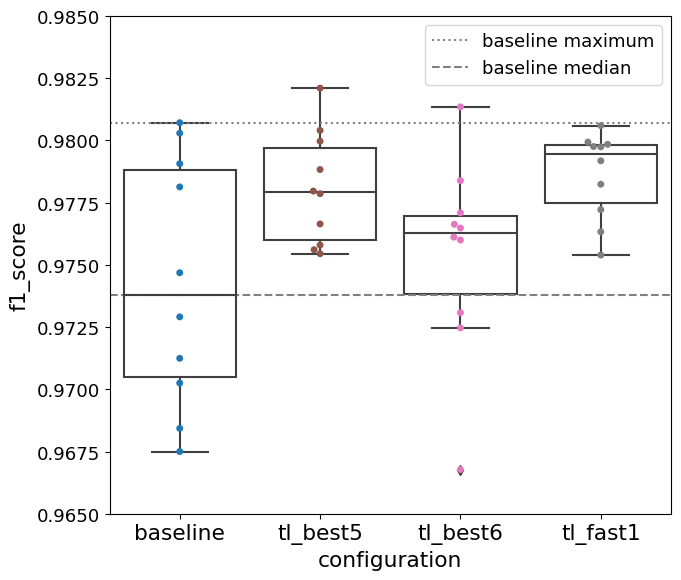

In [ ]:
plt.rc('font', size=13)

fig = plt.figure(figsize=(7, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours, boxprops={'facecolor':'None'},)
sns.swarmplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)
plt.ylim([0.965, 0.985])
plt.hlines(0.980712, -0.5, 3.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.973796, -0.5, 3.5, linestyles='dashed', color='grey', label='baseline median')

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='large')
ax.set_xlabel("configuration", size='large')
plt.xticks(fontsize='large')
plt.legend()

#ax.set_xticks([])
fig.tight_layout()

#fig.savefig('../figs/glitches/15_baseline_best5_fast1.png', dpi=600)